In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

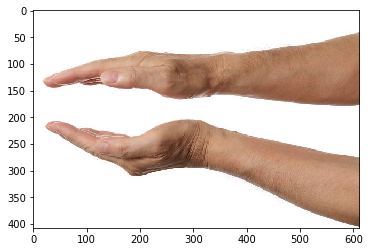

In [6]:
#READ in image
image = cv2.imread('images/white-hand.jpg')

#make a copy
image_copy = np.copy(image)

#convert to RGB
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB )

#plt image
plt.imshow(image_copy)


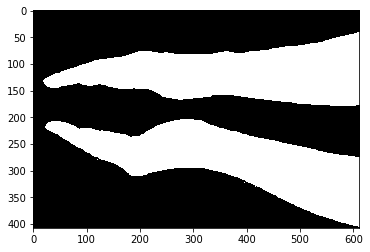

In [7]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')


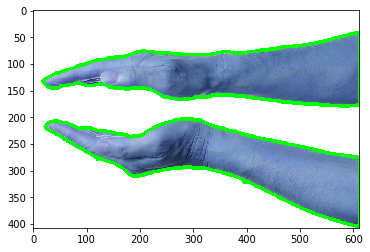

In [26]:
# Find contours from thresholded, binary image
# retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# im2, contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 5)

plt.imshow(contours_image)

In [29]:
grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
grey_hist=cv2.calcHist([grey],[0],None,[256],[0,256])
eq=cv2.equalizeHist(grey)
blurredA1=cv2.blur(eq,(3,3))
(T,thresh)=cv2.threshold(blurredA1,190,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

if len(contours) != 0:
  for i in range(len(contours)):
    if len(contours[i]) >= 5:
      cv2.drawContours(thresh,contours,-1,(255,0,0),3)
      ellipse=cv2.fitEllipse(contours[0])
    else:
      # optional to "delete" the small contours
      cv2.drawContours(thresh,contours,-1,(0,0,0),-1)

cv2.imshow("Perfectlyfittedellipses",thresh)
cv2.waitKey(0)

-1